# Wrangling and Analyzing WeRateDogs Twitter Dataset

# 1. Gathering Data

- Importing relevant modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import requests
import tweepy
import json
from decouple import config

%matplotlib inline

### 1.1. WeRateDogs Twitter archive

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### 1.2. The tweet image predictions
- Downloading a file containing image predictions after running every image in the twitter archive through a neural newtwork that can classify breeds of dogs

In [3]:
# request code
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

200

In [4]:
# split from the right side
file_name = url.rsplit('/', 1)[-1]

# download the file if it does not exist
if not os.path.isfile(file_name):
    with open(file_name, mode='wb') as file:
        file.write(response.content)

In [5]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### 1.3. Querying Twitter Data
- Using the tweet IDs to store each tweets entire set of JSON data in tweet_json.txt file
- Each tweets JSON data should be written to it's own line

In [6]:
api_key = config('API_KEY')
api_key_secret = config('API_KEY_SECRET')
bearer_token = config('BEARER_TOKEN')
access_token = config('ACCESS_TOKEN')
access_token_secret = config('ACCESS_TOKEN_SECRET')

In [7]:
auth = tweepy.OAuth1UserHandler(
    consumer_key=api_key, consumer_secret=api_key_secret, access_token=access_token, access_token_secret=access_token_secret
)
api = tweepy.API(auth)

In [8]:
tweet_ids = []
for id in twitter_archive.tweet_id:
    tweet_ids.append(id)
len(tweet_ids)

2356

### Writing and Reading Twitter JSON
- Passing the `%%capture` magic command that captures all outputs from a cell

In [12]:
%%capture

with open('tweet_json.txt', 'w') as outfile:
    for id in tweet_ids:
        try:
            ranking = tweet_ids.index(id) + 1
            # printing out each id after querying
            print(ranking)
            tweet = api.get_status(id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            # except Exception as e:
            print(str(ranking) + "_" + str(id) + ": " + str(e))
            continue

- Reading the `.txt` file into a pandas dataframe

In [9]:
api_data =[]

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        likes = tweet['favorite_count']
        tweet_text = tweet['full_text']
        api_data.append({
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'likes': likes,
        })

- Length of the gathered data

In [10]:
# len(api_data)
list.__len__(api_data)

2327

- Loading the data into a pandas dataframe.

In [11]:
tweet_df = pd.DataFrame(api_data)
tweet_df.head(3)

,tweet_id,retweet_count,likes
0,892420643555336193,7009,33803
1,892177421306343426,5302,29324
2,891815181378084864,3482,22058


# 2. Assess
## 2.1 Assess tweet_archive
### 2.1.1 Virtual Assessment

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Data Quality using visual assesment

1. __name__
- From the three columns above, its noticeable that some dogs have been named "a", "the", "his"
- Its unreasonable that a dog will have such names
- There maybe some other invalid names like "a" in the `name` column, we therefore need a thorough look into it

### 2.1.2 Programatic Assessment

- Non directed programatic assessment

In [13]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1389,700167517596164096,NaN,NaN,2016-02-18 03:58:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dotsy. She's stuck as hell. 10/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700167517...,10,10,Dotsy,None,None,None,None
637,793286476301799424,NaN,NaN,2016-11-01 03:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
385,826848821049180160,NaN,NaN,2017-02-01 17:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826848821...,13,10,Cupid,doggo,None,None,None
807,771908950375665664,NaN,NaN,2016-09-03 03:13:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Doggo will persevere. 13/10\nhttps://t.co/yOVz...,NaN,NaN,NaN,https://twitter.com/yahoonews/status/771905568...,13,10,None,doggo,None,None,None


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Data Quality using programmatic assesment
__1. retweets and replies__
- The dataset is about rating of dog images and we only want original ratings(no retweets) that have images.
- We have to delete the retweets and replies from the dataset (delete the rows first because they have data that relates to the column)
- If we only drop the columns we will be left with data that has a relation with the removed column
- When all replies and retweets are removed the corresponding columns will contain `np.nan` values and it will be unnecessary to keep them

__2. timestamp__
- Timestamp should be a datetimesatmp data type

In [17]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

__3. redundant text in source__
- `source` column contains some redundant text. The html syntax in the text should be removed, we need to extract the source

- Code to extend the text limit in output

In [18]:
pd.set_option('display.max_colwidth', 300)

In [19]:
twitter_archive['text'].sample(20)

1509                                                                  Say hello to Leo. He's a Fallopian Puffalope. Precious af. 12/10 would cuddle https://t.co/LZEi0DpRsH
1226                                  This is Kanu. He's a Freckled Ticonderoga. Simply flawless. 12/10 would perform an elaborate heist to capture https://t.co/7vyAzIURrE
1311                                               This is Tucker. He's a Dasani Episcopalian. Good lord what a tongue. 12/10 would never let go of https://t.co/gHtW5cgyy7
489                                                   This is Chubbs. He dug a hole and now he's stuck in it. Dang h*ckin doggo. 11/10 would assist https://t.co/z1VRj1cYZf
536                     This is Lennon. He's a Boopershnoop Pupperdoop. Quite rare. Exceptionally pettable. 12/10 would definitely boop that shnoop https://t.co/fhgP6vSfhX
2280                                   This is Fwed. He is a Canadian Asian Taylormade. Was having a blast until pink spiky football attacke


- From the text we are able to tell whether the items are dogs or not dogs

In [20]:
twitter_archive[twitter_archive['text'].str.match('.*only rate dogs')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448815771648/photo/1,12,10,None,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562936811520/photo/1,12,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495410671616/photo/1,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,679530280114372609,NaN,NaN,2015-12-23 05:13:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679530280114372609/photo/1,7,10,a,None,None,None,None
1745,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I know everyone's excited for Christmas but that doesn't mean you can send in reindeer. We only rate dogs... 8/10 https://t.co/eWjWgbOCYL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763231985668/photo/1,8,10,None,None,None,None,None
1854,675534494439489536,NaN,NaN,2015-12-12 04:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675534494439489536/photo/1,11,10,a,None,None,None,None
1877,675109292475830276,NaN,NaN,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675109292475830276/photo/1,9,10,a,None,None,None,None


In [21]:
twitter_archive[twitter_archive['text'].str.match('.*only rate dogs')].index

Int64Index([  25,   59,   93,  118,  127,  131,  141,  154,  169,  193,  221,
             226,  246,  314,  386,  390,  411,  416,  419,  494,  506,  521,
             538,  542,  732,  744,  759,  773,  801,  819,  841,  869,  887,
             890, 1017, 1031, 1071, 1077, 1085, 1090, 1097, 1102, 1121, 1150,
            1193, 1207, 1225, 1234, 1290, 1356, 1362, 1385, 1435, 1527, 1564,
            1610, 1693, 1699, 1726, 1737, 1745, 1854, 1877, 1938],
           dtype='int64')

__4. only_rate dogs__
- `text` column contains some text that is not dogs. We need to remove these rows

__5. some ratings were not properly recorded__

- Printing a concise summary of the data frame

In [22]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- There seems to be a problrm with the `max` and `min` score of the `rating_numerator` and `rating_denominator`.
- Use regular expression to extract the numerator

__6. rating denominator column is not necessary__
- All scores in the `rating_denominator` are known to be 10 so its not necessary to keep it
- Get rid of the rating_denominator and rename the rating_numerator to rating
- Change the data type to float

In [23]:
twitter_archive.duplicated().sum()

0

- The dataset has no duplicates

### Data Tidiness using programmatic assesment
__1. doggo, floofer, pupper, puppo should be in one column__
- They should be grouped under a `dog_stage` column

In [24]:
twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

## 2.2 Assess image_predictions
### 2.2.1 Virtual Assessment

In [25]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### 2.2.2 Programatic Assessment

In [26]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [28]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1471,779377524342161408,https://pbs.twimg.com/ext_tw_video_thumb/779377444025499652/pu/img/eIiLDy9F6rPNarEc.jpg,1,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False
768,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_Staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
1866,843604394117681152,https://pbs.twimg.com/media/C7UVuE_U0AI8GGl.jpg,1,Labrador_retriever,0.430583,True,golden_retriever,0.263581,True,Great_Pyrenees,0.179385,True
399,673686845050527744,https://pbs.twimg.com/media/CVlqi_AXIAASlcD.jpg,1,Pekinese,0.185903,True,guinea_pig,0.172951,False,pug,0.166183,True


In [29]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Data Tidiness using programmatic assesment
__1. create a breed and confidence column__
- Reduce the columns (from index 3 to 11) into two

In [30]:
image_predictions.duplicated().sum()

0

- printing the datasets concise summary

In [31]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## 2.3 Assess api_data
### 2.3.1 Virtual Assessment

In [32]:
tweet_df

,tweet_id,retweet_count,likes
0,892420643555336193,7009,33803
1,892177421306343426,5302,29324
2,891815181378084864,3482,22058
3,891689557279858688,7220,36915
4,891327558926688256,7764,35278
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


### 2.3.2 Programmatic Assessment

In [33]:
tweet_df.head()

,tweet_id,retweet_count,likes
0,892420643555336193,7009,33803
1,892177421306343426,5302,29324
2,891815181378084864,3482,22058
3,891689557279858688,7220,36915
4,891327558926688256,7764,35278


In [34]:
tweet_df.tail()

,tweet_id,retweet_count,likes
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,423,2291


In [35]:
tweet_df.sample(5)

,tweet_id,retweet_count,likes
1144,720389942216527872,2270,5879
1426,695446424020918272,1658,4103
1114,727524757080539137,1089,4121
1907,673956914389192708,839,1752
149,861383897657036800,9274,32300


In [36]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2327 non-null   int64
 1   retweet_count  2327 non-null   int64
 2   likes          2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [37]:
tweet_df.describe()

,tweet_id,retweet_count,likes
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2472.082510,7052.606790
std,6.820795e+16,4186.297259,10957.789433
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1226.500000
50%,7.178418e+17,1149.000000,3052.000000
75%,7.986547e+17,2862.500000,8602.500000
max,8.924206e+17,70775.000000,144846.000000


- Some maximum values seem weird.
- Discover the correlation between `retweet_count` and `likes`

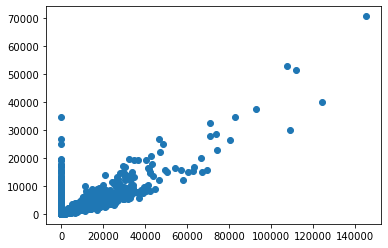

In [38]:
plt.scatter(data=tweet_df, x='likes', y='retweet_count');

- The indication is that there is a high correlation between likes and retweets.
- Surprisingly, there are data points which have `0` likes and a high number of retweets

In [39]:
tweet_df.query('retweet_count == 0')

,tweet_id,retweet_count,likes


In [40]:
tweet_df.query('likes == 0')

,tweet_id,retweet_count,likes
31,886054160059072513,93,0
35,885311592912609280,15442,0
67,879130579576475649,5743,0
72,878404777348136964,1076,0
73,878316110768087041,5531,0
...,...,...,...
995,746521445350707200,901,0
1015,743835915802583040,1874,0
1214,711998809858043904,122,0
2230,667550904950915073,29,0


- These data points should be cleaned, they may be a result of outliers

# Assesment Summary
## Quality
#### twitter_archive
1. _dataset contains retweets and replies (research focuses on original tweets)_
2. _ratings were not properly extracted, some values are invalid too_
3. _rating_numerator, rating_denominator, expanded_url not necessary_ 
4. _Erroneous data types (timestamp, rating)_
5. _redundant text in source (html tags)_
6. _only rate dogs(some rows contain non dog ratings)_
7. _invalid names ("his", "a" - start with lowercase )_
#### api_data
8. _outliers (unreasonable for a tweet to have 0 likes and high retweets)_

## Tidiness
1. `twitter_archive`: _doggo, fluffer should be in a dog_stage column_
2. `image_predictions`: _breed and confidence column_
3. _ Merge the three dataframes (they are one observational unit)_

# 3. Clean

- Making a copy of each dataset

In [41]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Cleaning for Quality

### 1. `twitter_archive`:dataset contains retweets and replies (research focuses on original tweets)
##### Define
- Drop all the rows where `in_reply_to_status_id` and `retweeted_status_id` are not null
- Drop the corresponding columns

##### Code

In [43]:
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive['in_reply_to_user_id'].isnull()]
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive['retweeted_status_id'].isnull()]

In [44]:
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean.drop(columns_to_drop, axis=1, inplace=True)

##### Test

In [45]:
len(twitter_archive)

2356

In [46]:
len(twitter_archive_clean)

2097

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### 2. `twitter_archive`: ratings were not properly extracted, some values are invalid too
##### Define
- Use regular expression to extract the numerator in the fraction contained in the text column then store the values in a `rating` column
- Convert the rating column from `string` to `float`
- Drop the rows with invalid rating (all of the score in `rating_denominator` should be __10__, and the score in `rating_numerator` should not exceed __15__).
- Drop the rows with a rating of above 15 in the `rating` column

##### Code

In [48]:
twitter_archive_clean['rating'] = twitter_archive_clean.text.str.extract('(?:((?:\d+\.)?\d+)\/){0}(?:((?:\d+\.)?\d+)\/)')[1]

In [49]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating'].astype(float)

In [50]:
twitter_archive_clean = twitter_archive_clean.query('rating <= 15')

##### Test

In [51]:
twitter_archive_clean.rating.value_counts()

12.00    486
10.00    436
11.00    413
13.00    287
9.00     153
8.00      98
7.00      52
14.00     38
5.00      33
6.00      32
3.00      19
4.00      16
2.00       9
1.00       5
9.75       1
11.27      1
0.00       1
13.50      1
11.26      1
Name: rating, dtype: int64

In [52]:
twitter_archive_clean.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator        int64
rating_denominator      int64
name                   object
doggo                  object
floofer                object
pupper                 object
puppo                  object
rating                float64
dtype: object

### 3. `twitter_archive`: rating_numerator, rating_denominator, expanded_url not necessary
##### Define
- Use the `pandas` `.drop` method to drop the `rating_denominator`, `rating_numerator` and `expanded_url` columns

##### Code

In [53]:
twitter_archive_clean.drop(['expanded_urls', 'rating_numerator', 'rating_denominator'], axis=1, inplace=True)

##### Test

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2082 non-null   int64  
 1   timestamp  2082 non-null   object 
 2   source     2082 non-null   object 
 3   text       2082 non-null   object 
 4   name       2082 non-null   object 
 5   doggo      2082 non-null   object 
 6   floofer    2082 non-null   object 
 7   pupper     2082 non-null   object 
 8   puppo      2082 non-null   object 
 9   rating     2082 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 178.9+ KB


### 4. `twitter_archive`: Erroneous data types (timestamp)
##### Define
- Change the data type of the `timestamp` column to datetime

##### Code

In [55]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2082 non-null   int64              
 1   timestamp  2082 non-null   datetime64[ns, UTC]
 2   source     2082 non-null   object             
 3   text       2082 non-null   object             
 4   name       2082 non-null   object             
 5   doggo      2082 non-null   object             
 6   floofer    2082 non-null   object             
 7   pupper     2082 non-null   object             
 8   puppo      2082 non-null   object             
 9   rating     2082 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 178.9+ KB


### 5. `twitter_archive`: redundant text in source (html tags)
##### Define
- Extract the text part from each record and remove the html syntax

##### Code

In [57]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [58]:
twitter_archive_clean.source = twitter_archive_clean.source.str.split('>').str[1].str[:-3]

##### Test

In [59]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1950
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

### 6. `twitter_archive`: only rate dogs(some rows contain non dog ratings)
##### Define
- Match the text in the `text` columnn to get the indexes of rows that have "only rate dogs" then drop them

##### Code

In [60]:
indexes = twitter_archive_clean[twitter_archive_clean['text'].str.match('.*only rate dogs')].index
indexes

Int64Index([  25,   59,   93,  127,  131,  141,  154,  169,  193,  221,  226,
             246,  314,  390,  416,  419,  494,  521,  542,  732,  744,  801,
             819,  869,  887, 1017, 1031, 1071, 1077, 1085, 1090, 1097, 1102,
            1121, 1150, 1193, 1207, 1225, 1234, 1290, 1362, 1385, 1435, 1527,
            1564, 1610, 1693, 1699, 1726, 1737, 1745, 1854, 1877, 1938],
           dtype='int64')

In [61]:
twitter_archive_clean = twitter_archive_clean.drop(indexes)

##### Test

In [62]:
twitter_archive_clean[twitter_archive_clean['text'].str.match('.*only rate dogs')].index

Int64Index([], dtype='int64')

In [63]:
# should drop by 54 (from 2082 to 2028)
len(twitter_archive_clean)

2028

### 7. `twitter_archive`: invalid names ("his", "a" - start with lowercase )
##### Define
- Identify the invalid names and replace them with "None"

##### Code

In [64]:
def convert_name(name):
    """
    Replacing the invalid name
    """
    if name[0].islower():
        return "None"
    return name

twitter_archive_clean.name = twitter_archive_clean['name'].apply(convert_name)

##### Test

In [65]:
for name in twitter_archive_clean.name:
    if name[0].islower():
        print("Invalid name")
        break

print("All names are valid")

All names are valid


### 8. `api_data`: outliers (unreasonable for a tweet to have 0 likes and high retweets)
##### Define
- Remove the records with invalid likes and retweets

##### Code

In [66]:
tweet_df_clean = tweet_df_clean.query('retweet_count != 0 and likes != 0')

##### Test

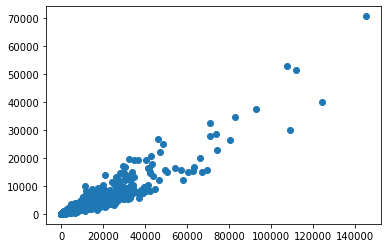

In [67]:
plt.scatter(data=tweet_df_clean, x='likes', y='retweet_count');

## Cleaning for Tidiness

### 1. `twitter_archive`:  _doggo, fluffer should be in a dog_stage column_
##### Define
- Change the 1976 "None" values to "NaN" to be able to take them out
- combine the four dog stages to one column
- Drop the doggo, floofer, pupper and puppo columns

##### Code

In [68]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1692
                pupper  None      221
doggo  None     None    None       72
None   None     None    puppo      23
       floofer  None    None        9
doggo  None     pupper  None        9
                None    puppo       1
       floofer  None    None        1
dtype: int64

In [69]:
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

In [70]:
twitter_archive_clean[dog_stages] = twitter_archive_clean[dog_stages].replace('None', np.nan)

In [71]:
def join(x):
    """
    Merging four columns into a single column

    Returns:
        drop nulls, convert to str then join with comma
    Example:
        ['None', 'floofer', 'Noner', 'puppo'] -> [NaN,'floofer', Nan, 'puppo'] -> [, 'floofer', , 'puppo']-> [' ,floofer, ,puppo']

    """
    return ', '.join(x.dropna().astype(str))

twitter_archive_clean['dog_stages'] = twitter_archive_clean[dog_stages].apply(join, axis=1)

# dropping spaces that exist in the column with nan
twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].replace('', np.nan)

In [72]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [73]:
twitter_archive_clean['dog_stages'].value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

In [74]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    2028 non-null   int64              
 1   timestamp   2028 non-null   datetime64[ns, UTC]
 2   source      2028 non-null   object             
 3   text        2028 non-null   object             
 4   name        2028 non-null   object             
 5   rating      2028 non-null   float64            
 6   dog_stages  336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(4)
memory usage: 126.8+ KB


### 2. `image_predictions`: breed and confidence column
##### Define
- Create a criteria where the p1, p2 and p3 dogs are true (take the dog predictions only)
- We can now use this criteria anywhere now (only picking the columns where there are true)
- Do the same for breed
- create two columns(breed and confidence) and select based on criteria
- Use the select function from numpy (when dealing with objects the default is equated to None, when dealing with numbers the condition is defaulted to zero)
- Finally do the same for conf
- We now have breed and confidence so the next thing is to delete the `_conf` columns
- Drop the corresponding columns

##### Code

In [75]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [76]:
# they are booleans but ideally we should look at them differently
image_predictions_clean[['p1_dog', 'p2_dog', 'p3_dog']].value_counts()

p1_dog  p2_dog  p3_dog
True    True    True      1243
False   False   False      324
True    True    False      155
False   True    True       101
True    False   True        91
False   False   True        64
        True    False       54
True    False   False       43
dtype: int64

In [77]:
criteria = [(image_predictions_clean['p1_dog'] == True),(image_predictions_clean['p2_dog'] == True), (image_predictions_clean['p3_dog'] == True)]

In [78]:
image_predictions_clean['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [79]:
image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [80]:
image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [81]:
# Because they are not boolean values we do not need to equate them to true
breed = [(image_predictions_clean['p1']),(image_predictions_clean['p2']), (image_predictions_clean['p3'])]

In [82]:
conf = [(image_predictions_clean['p1_conf']),(image_predictions_clean['p2_conf']), (image_predictions_clean['p3_conf'])]

In [83]:
image_predictions_clean['breed'] = np.select(criteria, breed, default='none')
image_predictions_clean['confidence'] = np.select(criteria, conf, default=0)

In [84]:
# Remove all columns between column index 3 to 12
image_predictions_clean.drop(image_predictions_clean.iloc[:, 3:12], inplace=True, axis=1)

##### Test

In [85]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   breed       2075 non-null   object 
 4   confidence  2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB



### 3. _Merging the dataframes (they are one observational unit)_
##### Define
- Combine `twitter_archive`, `image_predictions` and `tweet_df` into one dataframe

##### Code

In [233]:
# merged_twitter_archive = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='left')

In [86]:
from functools import reduce

#define list of DataFrames
dfs = [twitter_archive_clean, image_predictions_clean, tweet_df_clean]

#merge all DataFrames into one
master_dataset = reduce(lambda left, right: pd.merge(left, right, on=['tweet_id'], how='outer'), dfs)

##### Test

In [87]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2255
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2256 non-null   int64              
 1   timestamp      2028 non-null   datetime64[ns, UTC]
 2   source         2028 non-null   object             
 3   text           2028 non-null   object             
 4   name           2028 non-null   object             
 5   rating         2028 non-null   float64            
 6   dog_stages     336 non-null    object             
 7   jpg_url        2075 non-null   object             
 8   img_num        2075 non-null   float64            
 9   breed          2075 non-null   object             
 10  confidence     2075 non-null   float64            
 11  retweet_count  2167 non-null   float64            
 12  likes          2167 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5), int64(1),

- Change the datatypes of the columns that were affected by the merge
- Start by dropping the null values in the corresponding columns

In [97]:
master_dataset.dropna(subset=['img_num', 'retweet_count', 'likes'], inplace=True)

In [100]:
# converting columns to integer
master_dataset[['img_num', 'retweet_count', 'likes']] = master_dataset[['img_num', 'retweet_count', 'likes']].astype(int)

In [101]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2199
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1986 non-null   int64              
 1   timestamp      1896 non-null   datetime64[ns, UTC]
 2   source         1896 non-null   object             
 3   text           1896 non-null   object             
 4   name           1896 non-null   object             
 5   rating         1896 non-null   float64            
 6   dog_stages     302 non-null    object             
 7   jpg_url        1986 non-null   object             
 8   img_num        1986 non-null   int64              
 9   breed          1986 non-null   object             
 10  confidence     1986 non-null   float64            
 11  retweet_count  1986 non-null   int64              
 12  likes          1986 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(4),

In [105]:
master_dataset.sample(10)

,tweet_id,timestamp,source,text,name,rating,dog_stages,jpg_url,img_num,breed,confidence,retweet_count,likes
1211,692752401762250755,2016-01-28 16:53:37+00:00,Twitter for iPhone,"""Hello yes could I get one pupper to go please thank you""\nBoth 13/10 https://t.co/kYWcXbluUu",None,13.0,pupper,https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png,1,Samoyed,0.471276,3312,6297
2180,849776966551130114,NaT,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg,2,Chihuahua,0.292092,6832,27941
253,832369877331693569,2017-02-16 23:23:38+00:00,Twitter for iPhone,This is Charlie. He fell asleep on a heating vent. Would puppreciate your assistance. 11/10 someone help Charlie https://t.co/Dhdx5HnQ4d,Charlie,11.0,NaN,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg,1,kelpie,0.504690,2929,16108
1111,700518061187723268,2016-02-19 03:11:35+00:00,Twitter for iPhone,This is Vincent. He's the man your girl is with when she's not with you. 10/10 https://t.co/JQGMP7kzjD,Vincent,10.0,NaN,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,723,2404
388,810254108431155201,2016-12-17 22:43:27+00:00,Twitter for iPhone,"This is Gus. He likes to be close to you, which is good because you want to be close to Gus. 12/10 would boop then pet https://t.co/DrsrQkEfnb",Gus,12.0,NaN,https://pbs.twimg.com/media/Cz6Z0DgWIAAfdvp.jpg,1,Staffordshire_bullterrier,0.292556,3168,13977
636,764259802650378240,2016-08-13 00:38:30+00:00,Twitter for iPhone,This is Kota and her son Benedict. She doesn't know why you're staring. They are a normal family. Both 10/10 https://t.co/Q1v9BZylvZ,Kota,10.0,NaN,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1,German_shepherd,0.973677,1394,5647
1170,696405997980676096,2016-02-07 18:51:43+00:00,Twitter for iPhone,This is Berb. He just found out that they have made 31 Kidz Bop CD's. Downright terrifying. 7/10 hang in there Berb https://t.co/CIFLjiTFwZ,Berb,7.0,NaN,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,1,borzoi,0.132845,1056,2936
393,808733504066486276,2016-12-13 18:01:07+00:00,Twitter for iPhone,Here's a pupper in a onesie. Quite pupset about it. Currently plotting revenge. 12/10 would rescue https://t.co/xQfrbNK3HD,None,12.0,pupper,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,toy_poodle,0.036927,2034,7508
216,838561493054533637,2017-03-06 01:26:54+00:00,Twitter for iPhone,This is Walter. His owner has been watching all the Iditarod coverage and is convinced Walter can be a sled dog. 13/10 Walter isn't so sure https://t.co/0av1PEehFI,Walter,13.0,NaN,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,1234,10264
1635,673656262056419329,2015-12-07 00:12:23+00:00,Twitter for iPhone,This is Albert AKA King Banana Peel. He's a kind ruler of the kitchen. Very jubilant pupper. 10/10 overall great dog https://t.co/PN8hxgZ9We,Albert,10.0,pupper,https://pbs.twimg.com/media/CVlOy3pW4AQ9H1K.jpg,1,bull_mastiff,0.700625,199,650


# 4. Store

In [106]:
master_dataset.to_csv('twitter_archive_master', index=False)

In [107]:
twitter_archive_master = pd.read_csv('twitter_archive_master')

In [108]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       1986 non-null   int64  
 1   timestamp      1896 non-null   object 
 2   source         1896 non-null   object 
 3   text           1896 non-null   object 
 4   name           1896 non-null   object 
 5   rating         1896 non-null   float64
 6   dog_stages     302 non-null    object 
 7   jpg_url        1986 non-null   object 
 8   img_num        1986 non-null   int64  
 9   breed          1986 non-null   object 
 10  confidence     1986 non-null   float64
 11  retweet_count  1986 non-null   int64  
 12  likes          1986 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 201.8+ KB


# 5. Analyzing and Visualizing Data

### Question 1 : What is the source of most tweets? 

In [117]:
# twitter_archive_master['source'].value_counts().plot(kind='barh')

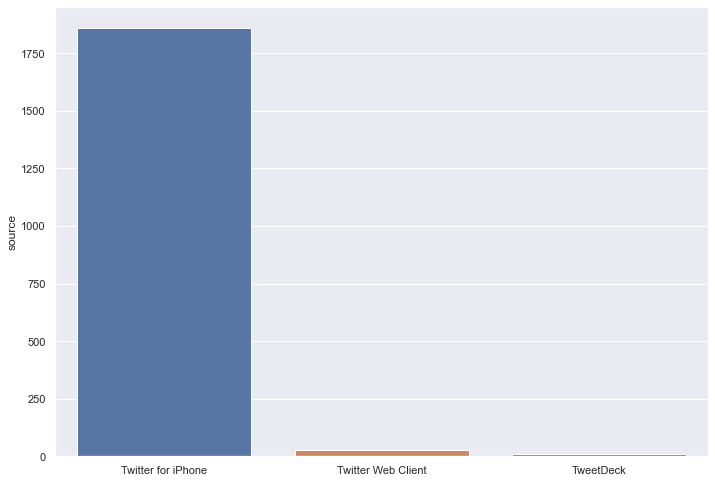

In [114]:
sb.set(rc={'figure.figsize': (11.7, 8.27)})
sb.barplot(x=twitter_archive_master.source.value_counts().index, y=twitter_archive_master.source.value_counts());

- From the barplot above it is evident that most tweets were tweeted ffrom iPhones

### Question 2. What is the relationship between `dog_stages` and `rating`?

- plotting the relationship of dog_stages and rating

Text(0, 0.5, 'rating')

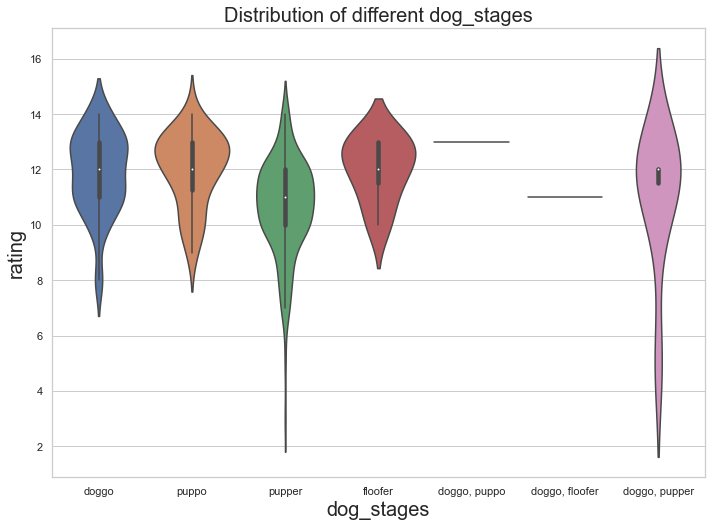

In [125]:
# plt.figure(figsize=[10, 4])
sb.set(style='whitegrid')
sb.violinplot(data=twitter_archive_master, x='dog_stages', y='rating');
plt.title("Distribution of different dog_stages", fontsize=20)
plt.xlabel('dog_stages', fontsize=20)
plt.ylabel('rating', fontsize=20)

Text(0, 0.5, 'Avg. Rating')

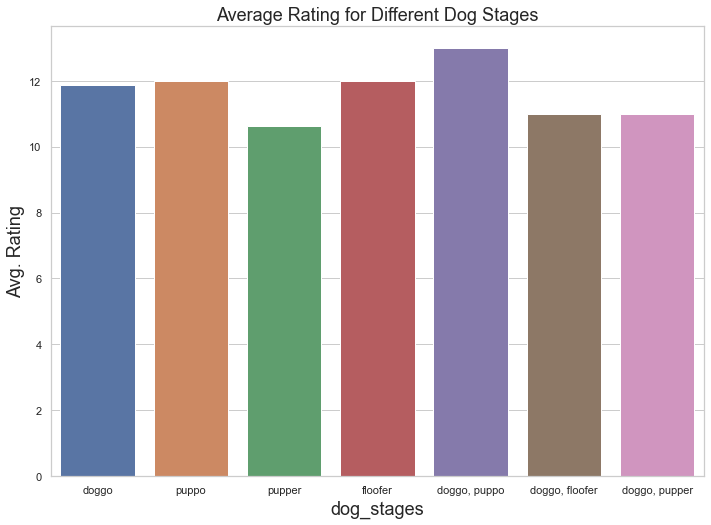

In [128]:
sb.barplot(data=twitter_archive_master, x='dog_stages', y='rating', ci=None);
plt.title('Average Rating for Different Dog Stages', fontsize=18)
plt.xlabel('dog_stages', fontsize=18)
plt.ylabel('Avg. Rating', fontsize=18)

- Without considering "doggo,poppo", "doggo,floofer", and "doggo,pupper", the pupper has a lower median of rating than other four stages.
- The average rating of the dog_stages are nearly the same, with all of them over 10.

### Question 3. What is the correlation between the columns in the dataset?

               tweet_id    rating   img_num  confidence  retweet_count     likes
tweet_id       1.000000  0.531670  0.213122    0.144771       0.384406  0.611960
rating         0.531670  1.000000  0.189949    0.270589       0.294082  0.391114
img_num        0.213122  0.189949  1.000000    0.140007       0.103952  0.129636
confidence     0.144771  0.270589  0.140007    1.000000       0.028996  0.072716
retweet_count  0.384406  0.294082  0.103952    0.028996       1.000000  0.928411
likes          0.611960  0.391114  0.129636    0.072716       0.928411  1.000000


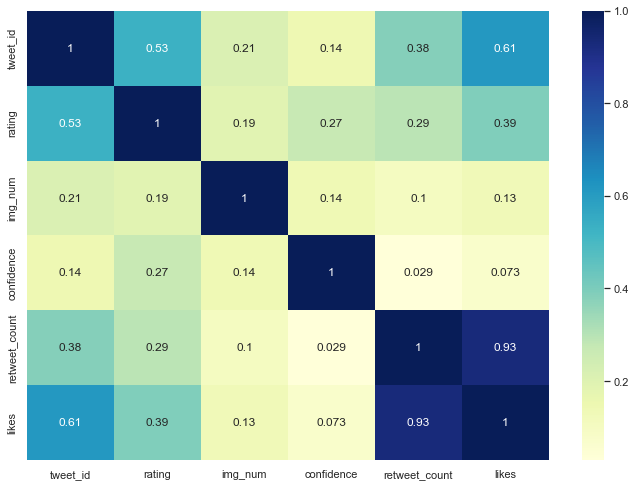

In [138]:
pd.set_option('display.width', 1000)
print(twitter_archive_master.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(twitter_archive_master.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()


- From the above visualization it is evident that the correlation between `retweet_count` and `likes` is high.